In [4]:
import pandas as pd

# Load the dataset (replace 'supermarket_data.csv' with the actual file name)
df = pd.read_csv(r"C:\Users\yashu\Downloads\SuperMarket Analysis.csv")

# Display the first few rows of the dataset
print(df.head())


    Invoice ID Branch       City Customer type  Gender  \
0          NaN   Alex     Yangon        Member     NaN   
1  226-31-3081   Giza  Naypyitaw           NaN  Female   
2          NaN   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex        NaN        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales  \
0                     NaN       74.69       7.0  26.1415  548.9715   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   
2      Home and lifestyle       46.33       NaN  16.2155       NaN   
3       Health and beauty       58.22       8.0  23.2880  489.0480   
4                     NaN       86.31       7.0  30.2085  634.3785   

         Date         Time  Payment    cogs  Unnamed: 14  gross income  Rating  
0  01-05-2019   1:08:00 PM  Ewallet  522.83     4.761905       26.1415     9.1  
1  03-08-2019  10:29:00 AM     Cash   76.40     4.761905        3.82

In [5]:
# Check the data types of all columns in the DataFrame
print(df.dtypes)


Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity         float64
Tax 5%           float64
Sales            float64
Date              object
Time              object
Payment           object
cogs             float64
Unnamed: 14      float64
gross income     float64
Rating           float64
dtype: object


In [5]:
# Check for missing values in each column
print(df.isnull().sum())

Invoice ID       23
Branch           10
City             16
Customer type    18
Gender            8
Product line      4
Unit price       22
Quantity         10
Tax 5%           17
Sales            23
Date              2
Time              0
Payment           1
cogs              1
Unnamed: 14       1
gross income      1
Rating            0
dtype: int64


In [6]:
# Total number of missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")


Total missing values: 157


In [8]:
# Percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
Invoice ID       2.3
Branch           1.0
City             1.6
Customer type    1.8
Gender           0.8
Product line     0.4
Unit price       2.2
Quantity         1.0
Tax 5%           1.7
Sales            2.3
Date             0.2
Time             0.0
Payment          0.1
cogs             0.1
Unnamed: 14      0.1
gross income     0.1
Rating           0.0
dtype: float64


In [10]:
# Drop rows with any missing values
df_dropped_rows = df.dropna()

# Drop columns with missing values
df_dropped_columns = df.dropna(axis=1)

print("Data after removing rows/columns with missing values:")
print(df_dropped_rows.head())
print(df_dropped_columns.head())


Data after removing rows/columns with missing values:
     Invoice ID Branch      City Customer type  Gender        Product line  \
9   692-92-5582  Cairo  Mandalay        Member  Female  Food and beverages   
14  829-34-3910   Alex    Yangon        Member  Female   Health and beauty   
16  656-95-9349   Alex    Yangon        Member  Female   Health and beauty   
18  329-62-1586   Alex    Yangon        Member  Female  Food and beverages   
19  319-50-3348  Cairo  Mandalay        Member  Female  Home and lifestyle   

    Unit price  Quantity   Tax 5%     Sales        Date         Time  \
9        54.84       3.0   8.2260  172.7460   2/20/2019   1:27:00 PM   
14       71.38      10.0  35.6900  749.4900   3/29/2019   7:21:00 PM   
16       68.93       7.0  24.1255  506.6355  03-11-2019  11:03:00 AM   
18       54.67       3.0   8.2005  172.2105   1/21/2019   6:00:00 PM   
19       40.30       2.0   4.0300   84.6300  03-11-2019   3:30:00 PM   

        Payment    cogs  Unnamed: 14  gross 

In [12]:
print(df.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'Unnamed: 14', 'gross income', 'Rating'],
      dtype='object')


In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\yashu\Downloads\SuperMarket Analysis.csv")  # Replace with the correct path if necessary

# Check the info of the DataFrame
print(df.info())  # Displays the structure, columns, and missing values

# Proceed with further operations after confirming df is loaded


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     977 non-null    object 
 1   Branch         990 non-null    object 
 2   City           984 non-null    object 
 3   Customer type  982 non-null    object 
 4   Gender         992 non-null    object 
 5   Product line   996 non-null    object 
 6   Unit price     978 non-null    float64
 7   Quantity       990 non-null    float64
 8   Tax 5%         983 non-null    float64
 9   Sales          977 non-null    float64
 10  Date           998 non-null    object 
 11  Time           1000 non-null   object 
 12  Payment        999 non-null    object 
 13  cogs           999 non-null    float64
 14  Unnamed: 14    999 non-null    float64
 15  gross income   999 non-null    float64
 16  Rating         1000 non-null   float64
dtypes: float64(8), object(9)
memory usage: 132.9+ KB
None

In [6]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns

# Fill missing values in numerical columns with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Verify that missing values are handled
print(df[numerical_columns].isnull().sum())


Unit price      0
Quantity        0
Tax 5%          0
Sales           0
cogs            0
Unnamed: 14     0
gross income    0
Rating          0
dtype: int64


In [8]:
# Fill missing values in categorical columns with the mode (most frequent value)
for column in categorical_columns:
    mode_value = df[column].mode()[0]  # Access the first mode value
    df[column] = df[column].fillna(mode_value)

# Verify that missing values are handled
print(df[categorical_columns].isnull().sum())


Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Date             0
Time             0
Payment          0
dtype: int64


In [9]:
# Final check for missing values
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Sales            0
Date             0
Time             0
Payment          0
cogs             0
Unnamed: 14      0
gross income     0
Rating           0
dtype: int64


In [10]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_supermarket_data.csv', index=False)


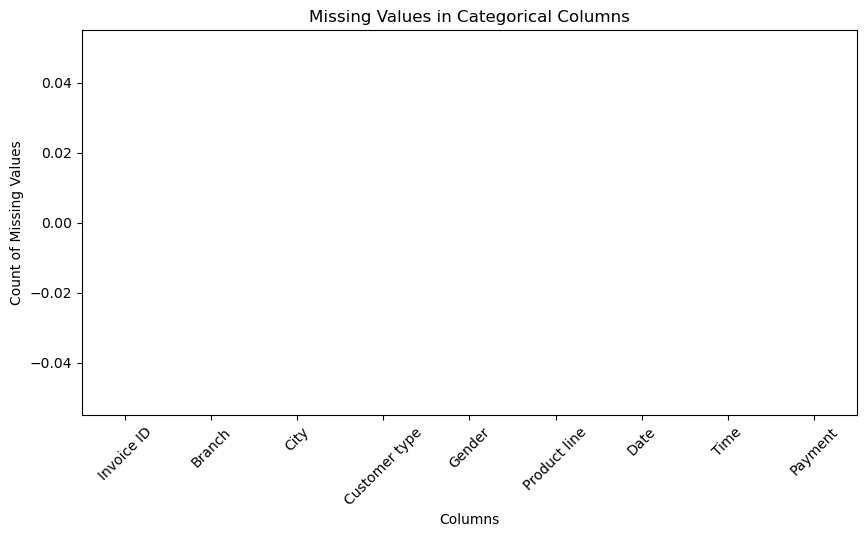

In [14]:
import matplotlib.pyplot as plt

# Count missing values in categorical columns
missing_categorical = df[categorical_columns].isnull().sum()

# Plot missing values for categorical columns
missing_categorical.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title('Missing Values in Categorical Columns')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()




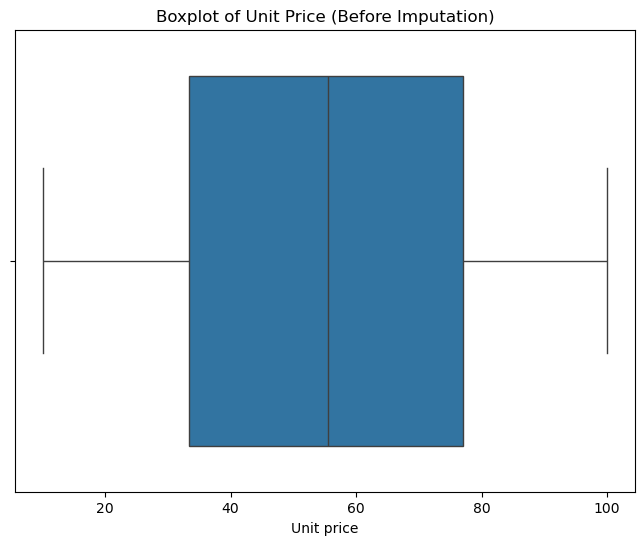

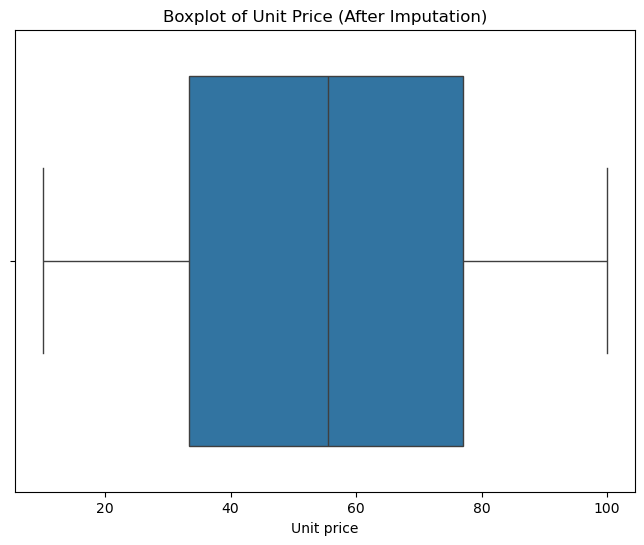

In [15]:
import seaborn as sns

# Plot boxplot of numerical column before imputation
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Unit price'])
plt.title('Boxplot of Unit Price (Before Imputation)')
plt.show()

# Impute numerical columns with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Plot boxplot of numerical column after imputation
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Unit price'])
plt.title('Boxplot of Unit Price (After Imputation)')
plt.show()
